# Credit EDA Assignment- Abhishek Raikwar

### Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1) If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
2) If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

1) The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample
2) All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

1) Approved: The Company has approved loan Application
2) Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.
4) Refused: The company had rejected the loan (because the client does not meet their requirements etc.
5) Unused offer:  Loan has been cancelled by the client but at different stages of the process.


# Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In [1]:
# Importing the usefull files.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing and understanding Application.csv

app=pd.read_csv("application_data.csv")
papp=pd.read_csv("previous_application.csv")

# Data Understanding

### Application data set

In [3]:
# Printing "Application data set".
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app.shape

(307511, 122)

In [5]:
# For making all columns visible.
pd.set_option("Display.max_rows", 200)
pd.set_option("Display.max_columns", 600)
pd.set_option("Display.width", 1250)

In [6]:
# Data type of the columns in "Application data set"
app.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [7]:
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### What we understand in "Application data" till now.

1) There are 3 types of data in this data set- Integer, Float, and Object.
2) There are some negative values in columns.
3) There are 307511(rows) and 122(columns).

# Previous application data set

In [8]:
# Printing "Previous application data set"
papp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Shape of "Previous application data set"
papp.shape

(1670214, 37)

In [10]:
# Data type of the columns in "Previous application data set"
papp.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [11]:
# Describing the "Previous application data set"
papp.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### What we understand in "Previous application data set" till now.

1) There are 3 data type observed in this data set- Integer, Float, and Object.
2) There are some negative values in columns.
3) There are 1670214(rows) and 37(columns).

In [12]:
# Checking null values in Previous Application data set column wise.
filled = papp.isnull().sum()

In [13]:
# Missing values more then 30% column wise.
filled=filled[filled.values>(0.3*len(filled))]
len(filled)

15

In [14]:
# Removing Missing value greater than 30%
filled = list(filled[filled.values>=0.3].index)
papp.drop(labels=filled,axis=1,inplace=True)
print(len(filled))

15


In [15]:
# Removing the column values of 'XNA' and 'XAP'

papp=papp.drop(papp[papp['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
papp=papp.drop(papp[papp['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
papp=papp.drop(papp[papp['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

papp.shape

(69635, 22)

# Data Cleaning of "Application data set"

In [16]:
app.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [17]:
# Checking null values in Application data set column wise.
blank=app.isnull().sum()

In [18]:
# Missing values more then 30% column wise.
blank=blank[blank.values>(0.3*len(blank))]
len(blank)

64

In [19]:
# Removing Missing value greater than 30%
blank = list(blank[blank.values>=0.3].index)
app.drop(labels=blank,axis=1,inplace=True)
print(len(blank))

64


In [20]:
app.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    12
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
CNT_FAM_MEMBERS                 2
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROC

### There are two columns of importance in this data set that have null values. This needs to be addressed. 
 1) AMT_ANNULITY
 2) CNT_FAM_MEMBERS 

### AMT ANNULITY

In [21]:
# First column "AMT ANNULITY"
app["AMT_ANNUITY"].isnull().sum()

12

In [22]:
# There are 12 null values in "AMT_ANNULITY" lets replace the value with median values.
app["AMT_ANNUITY"].fillna(app["AMT_ANNUITY"].median(),inplace=True)

In [23]:
# Checking "AMT_ANNULITY" null values
app["AMT_ANNUITY"].isnull().sum()

0

### CNT_FAM_MEMBERS

In [24]:
# Second we can see there is null values in "CNT_FAM_MEMBERS"
app["CNT_FAM_MEMBERS"].isnull().sum()

2

In [25]:
# There are 12 null values in "CNT_FAM_MEMBERS" lets replace the value with mode values.
app["CNT_FAM_MEMBERS"].fillna(app["CNT_FAM_MEMBERS"].mode,inplace=True)

In [26]:
# Checking "AMT_ANNULITY" null values
app["CNT_FAM_MEMBERS"].isnull().sum()

0

## Checking every column for data cleaning. 

# TARGET

In [27]:
# Describing "TARGET" column and investiagte for data cleaning. 
app.TARGET.describe()

count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64

In [28]:
# Cheking two unique variables and counts in "TARGET" columns.
counts = app['TARGET'].value_counts()
counts

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [29]:
app["TARGET_STR"] = app["TARGET"].apply(str)

There are two type of variables in TARGET column (1- clients with payment difficulties and 0- all other cases).

## CODE_GENDER 

In [30]:
# Describing the "CODE_GENDER" to find the data to clean if required.
app.CODE_GENDER.describe()

count     307511
unique         3
top            F
freq      202448
Name: CODE_GENDER, dtype: object

In [31]:
# Cheking three unique variables and counts in "CODE_GENDER" columns.
app['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [32]:
# Replacing XNA with F as there are more women in this sample and an introductionof 4 more values will not affect analysis hugely. 
app.loc[app['CODE_GENDER']=='XNA','CODE_GENDER']='F'

In [33]:
# Checking if XNA was replaced by F
app['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

Now we have only two Gender variables; F = Female and M = Male

## FLAG_OWN_CAR 

In [34]:
# Describing the "FLAG_OWN_CAR" to find the data to clean if required.
app.FLAG_OWN_CAR.describe()

count     307511
unique         2
top            N
freq      202924
Name: FLAG_OWN_CAR, dtype: object

In [35]:
# Cheking two unique variables and counts in "FLAG_OWN_CAR" columns.
app["FLAG_OWN_CAR"].value_counts()

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

There are only two variables; N for not owning a car, Y for owning a car. 

## FLAG_OWN_REALTY 

In [36]:
# Describing the "FLAG_OWN_REALTY" to find the data to clean if required.
app.FLAG_OWN_REALTY.describe()

count     307511
unique         2
top            Y
freq      213312
Name: FLAG_OWN_REALTY, dtype: object

In [37]:
# Cheking two unique variables and counts in "FLAG_OWN_REALTY" columns.
app["FLAG_OWN_REALTY"].value_counts()

FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64

There are two variables; Y for owning a flat or house and N for not owning a flat or a house. 

## CNT_CHILDREN

In [38]:
# Describing the "CNT_CHILDREN" to find the data to clean if required.
app.CNT_CHILDREN.describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [39]:
# Cheking variable counts of children age in "CNT_CHILDREN" columns.
app["CNT_CHILDREN"].value_counts()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64

As having 19 children is scientifically possible, we are considering the data; however, it could also be an outlier as well. 
If considered as an outlier, we will drop this variable for this client. 

## AMT_INCOME_TOTAL

In [40]:
# Describing the "AMT_INCOME_TOTAL" to find the data to clean if required.
app.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [41]:
bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,10000000000]
slot = ['0-50000','50000-100000','100000-150000', '150000-200000', '200000-250000','250000-300000','300000-350000','350000-400000','400000-450000','450000-500000','500000 and above']

In [42]:
# Creating bin for income amount as "AMT_INCOME"
app['AMT_INCOME']=pd.cut(app['AMT_INCOME_TOTAL'],bins= bins, labels=slot, right=False)
app.AMT_INCOME.describe()

count            307511
unique               11
top       100000-150000
freq              91591
Name: AMT_INCOME, dtype: object

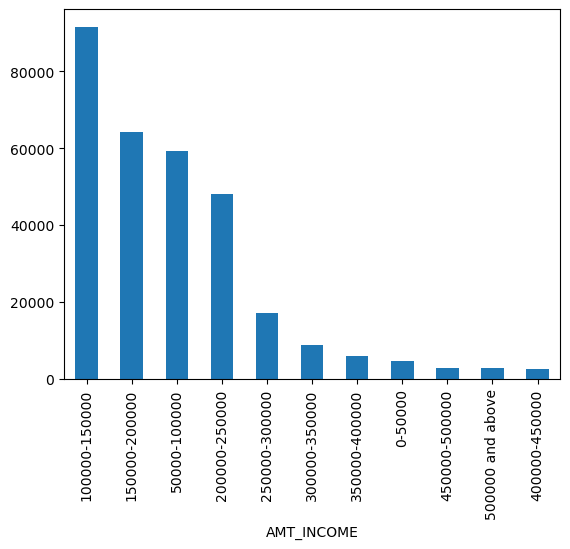

In [43]:
app.AMT_INCOME.value_counts().plot.bar()
plt.show()

The bar graph on the total income of clients presented above shows that majority of the clients earn between 50000 to 250000, anually, most probably. 

## AMT_CREDIT

In [44]:
# Describing the "AMT_CREDIT" to find the data to clean if required.
app.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [45]:
# Creating data bins 
values = [45000, 270000, 513531, 808650, 1200000, 1600000, 2000000, 2500000, 4050000]
values_labels = ['45000-270000', '270000-513500', '513500-808650', '808650-1.2M', '1.2M-1.6M', '1.6M-2M', '2M-2.5M', '2.5M-4.1M']

In [46]:
# Create a new column 'AMT_CREDIT_GROUP' based on the bins and labels
app['AMT_CREDIT_GROUP'] = pd.cut(app['AMT_CREDIT'], bins=values, labels=values_labels, right=False)
app.AMT_CREDIT_GROUP.value_counts()

AMT_CREDIT_GROUP
270000-513500    82480
513500-808650    73823
45000-270000     71180
808650-1.2M      52169
1.2M-1.6M        21161
1.6M-2M           4669
2M-2.5M           1668
2.5M-4.1M          353
Name: count, dtype: int64

<Axes: xlabel='AMT_CREDIT_GROUP'>

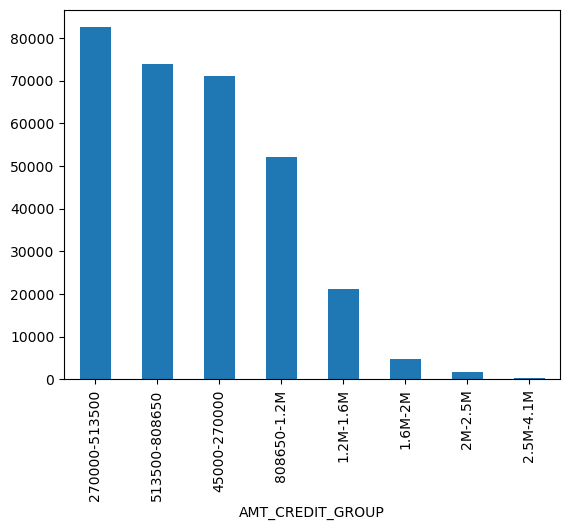

In [47]:
# Ploting boxplot to check the pattern in 'AMT_CREDIT'.
app.AMT_CREDIT_GROUP.value_counts().plot.bar()

This bargarph shows that the amount credited in the loan is usually between 45000 to 1.2 Million. 


## NAME_INCOME_TYPE

In [48]:
# Describing the "NAME_INCOME_TYPE" and investigating for cleaning data. 
app.NAME_INCOME_TYPE.describe()

count      307511
unique          8
top       Working
freq       158774
Name: NAME_INCOME_TYPE, dtype: object

In [49]:
# Cheking eight unique variables and counts in "NAME_INCOME_TYPE" columns.
app["NAME_INCOME_TYPE"].value_counts()

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

There are eight unique variables in the Income Type of clients
"Working", "Commercial associate", "Pensioner", "State servant","Unemployed","Student","Businessman", and "Maternity leave".

## NAME_EDUCATION_TYPE

In [50]:
# Describing the "NAME_EDUCATION_TYPE" to investigate for data cleaning
app.NAME_EDUCATION_TYPE.describe()

count                            307511
unique                                5
top       Secondary / secondary special
freq                             218391
Name: NAME_EDUCATION_TYPE, dtype: object

In [51]:
# Cheking five unique variables and counts in "NAME_EDUCATION_TYPE" columns.
app.NAME_EDUCATION_TYPE.value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

There are five unique variables in the variable of "Education type" namely "Secondary/ secondary special", "Higher education","Incomplete higher","Lower secondary",and "Academic degree".

## NAME_FAMILY_STATUS

In [52]:
# Describing the "NAME_FAMILY_STATUS" to check for data cleaning.
app.NAME_FAMILY_STATUS.describe()

count      307511
unique          6
top       Married
freq       196432
Name: NAME_FAMILY_STATUS, dtype: object

In [53]:
# Cheking six unique variables and counts in "NAME_FAMILY_STATUS" columns.
app.NAME_FAMILY_STATUS.value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

There are six unique variables in the Family Status of the clients namely,  "Married","Single/not married","Civil marriage","Separated","Widow", and "Unknown". 
The two "Unknown" variables will be replaced with "Married" status, as this will not change the result of our data.

In [54]:
# Replacing two unknown variable into Married status.
app.loc[app['NAME_FAMILY_STATUS']=='Unknown','NAME_FAMILY_STATUS']='Married'

In [55]:
# Checking if variable is replace or not
app.NAME_FAMILY_STATUS.value_counts()

NAME_FAMILY_STATUS
Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: count, dtype: int64

Checked if "Unknown" variable was replaced with "Married".

## NAME_HOUSING_TYPE 

In [56]:
# Describing the "NAME_HOUSING_TYPE" to find the data to clean if required.
app.NAME_HOUSING_TYPE.describe()

count                307511
unique                    6
top       House / apartment
freq                 272868
Name: NAME_HOUSING_TYPE, dtype: object

In [57]:
# Cheking six unique variables and counts in "NAME_HOUSING_TYPE" columns.
app.NAME_HOUSING_TYPE.value_counts()

NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

There are six type of housing data collected:  "House / apartment","With parents","Municipal apartment","Rented apartment","office apartment",and "Co-op apartment".

## REGION_POPULATION_RELATIVE 

In [58]:
# Describing the "REGION_POPULATION_RELATIVE" to find the data to clean if required.
app.REGION_POPULATION_RELATIVE.describe()

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

## DAYS_BIRTH 

In [59]:
# Describing the "DAYS_BIRTH" to find the data to clean if required.
app.DAYS_BIRTH.describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [60]:
# Converting the DAYS_BIRTH to YEARS.
app.DAYS_BIRTH = app.DAYS_BIRTH.apply(lambda x: abs(x//365))
app.rename({'DAYS_BIRTH':'YEARS_BIRTH'},axis=1, inplace=True)
app.YEARS_BIRTH.describe()

count    307511.000000
mean         44.433090
std          11.954493
min          21.000000
25%          35.000000
50%          44.000000
75%          54.000000
max          70.000000
Name: YEARS_BIRTH, dtype: float64

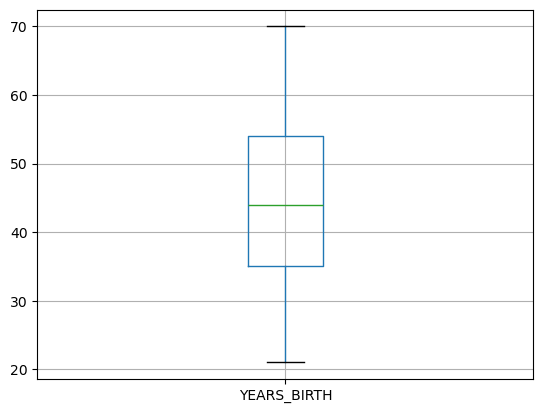

In [61]:
# plotting box plot of YEARS_BIRTH.
app.boxplot(column=['YEARS_BIRTH'])
plt.show() 

The above box plot shows that the clients are at a median age of 45. Some are close to 20 years of age and some are as old as 70 years. These extremes of ages could be outliers; however, in our case we will not be removing them from the data set. 

In [62]:
# Binning age and creating new column.
app["Age_year_group"]= pd.cut(app.YEARS_BIRTH,bins=[15,25,35,45,55,65,75])
app['Age_year_group'].value_counts()

Age_year_group
(35, 45]    84274
(25, 35]    72302
(45, 55]    70077
(55, 65]    60596
(15, 25]    12159
(65, 75]     8103
Name: count, dtype: int64

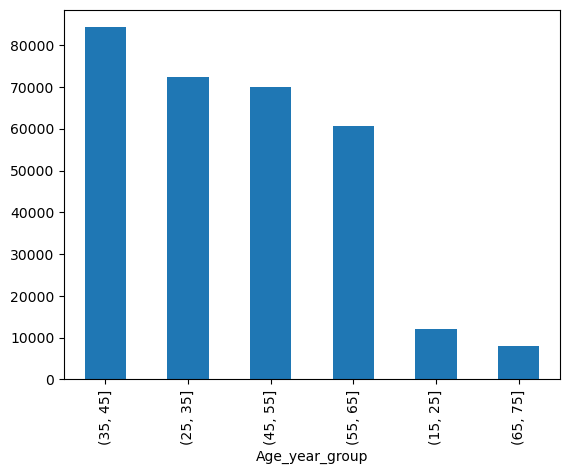

In [63]:
app.Age_year_group.value_counts().plot.bar()
plt.show()

The above bar graph shows the distribution of age groups and the number of clients in those age groups. 

## ORGANIZATION_TYPE

In [64]:
app.ORGANIZATION_TYPE.describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [65]:
app['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

There are 55374 non available data regarding the organization type. If we drop these values they will not affect our analysis. 

In [66]:
# Droping the rows of '55374' XNA from the data.
app=app.drop(app.loc[app['ORGANIZATION_TYPE']=='XNA'].index)
app[app['ORGANIZATION_TYPE']=='XNA'].shape

(0, 62)

We can confirm XNA values have been removed from the data set. 

In [67]:
# Dividing the dataset into two dataset of target=1(client with payment difficulties) and target=0(all other); to analyse them individually with all variables. 

app1=app.loc[app["TARGET"]==0]
app2=app.loc[app["TARGET"]==1]

In [68]:
app1.describe()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,YEARS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,230302.000000,230302.0,230302.000000,2.303020e+05,2.303020e+05,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230301.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000,230302.000000
mean,278159.213719,0.0,0.496696,1.764984e+05,6.164879e+05,27902.554759,0.021068,41.163494,-2438.140133,-4671.568185,-2819.261709,0.999996,0.999952,0.240567,0.997859,0.281005,0.063951,2.034342,2.012814,12.234900,0.017065,0.061762,0.049704,0.086074,0.275061,0.215856,-986.396277,0.000039,0.757462,0.000087,0.016279,0.008910,0.000213,0.098314,0.004711,0.000026,0.004898,0.000009,0.004516,0.003739,0.001533,0.012405,0.000343,0.010152,0.000725,0.000617,0.000386
std,102858.253592,0.0,0.761316,1.154998e+05,4.114378e+05,14833.644504,0.014038,10.041600,2372.409464,3264.517385,1515.106616,0.002084,0.006911,0.427429,0.046218,0.449491,0.244666,0.511768,0.505639,3.297705,0.129512,0.240724,0.217334,0.280474,0.446546,0.411416,832.246348,0.006251,0.428619,0.009319,0.126545,0.093972,0.014585,0.297740,0.068476,0.005104,0.069814,0.002947,0.067048,0.061030,0.039121,0.110687,0.018518,0.100244,0.026919,0.024823,0.019655
min,100003.000000,0.0,0.000000,2.565000e+04,4.500000e+04,1980.000000,0.000290,21.000000,-17912.000000,-22701.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188932.500000,0.0,0.000000,1.125000e+05,2.762775e+05,16969.500000,0.010006,33.000000,-3254.000000,-7010.000000,-4191.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1597.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278200.500000,0.0,0.000000,1.575000e+05,5.212800e+05,25843.500000,0.018850,41.000000,-1691.000000,-4299.000000,-2917.500000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-783.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367238.750000,0.0,1.000000,2.160000e+05,8.353800e+05,35743.500000,0.028663,49.000000,-789.000000,-1869.000000,-1510.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,

## Checking imbalance percentage in the Non-defaulter and Defaulter

In [69]:
# checking imbalance percentage in the data set

round(len(app1)/len(app2),2)

10.55

The Imbalance ratio is 10.55.  

## Univariate variable

### Percentage of Defaulter and Non-Defaulter

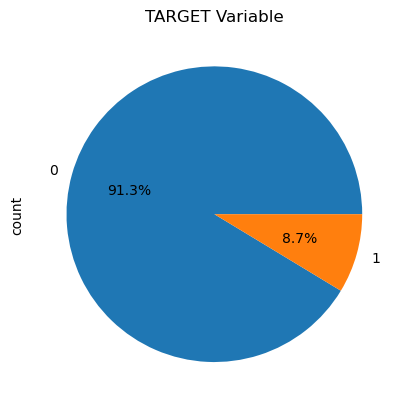

In [70]:
# Distribution of Defaulter and Non Defaulter by pie chart.
app.TARGET.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('TARGET Variable')
plt.show()

1 in "Target" describes Defaulters or clients who are unable to pay their loans and 0 are Non defaulters who are able to pay their loans on time. 

In this pie chart describing "Target", we can see that the clients with financial difficulties to pay are at 8.1% and all other cases are at 91.9%.

### Status of previous application status.

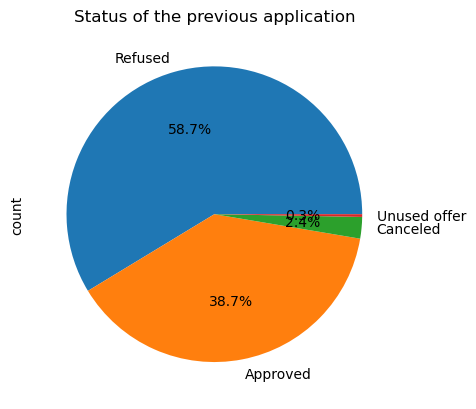

In [71]:
# Distribution of Previous application status
papp.NAME_CONTRACT_STATUS.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Status of the previous application')
plt.show()

In the pie chart, the percentage of previous approved loans were are 62.1% which was significantly higher. 

Very less percentage of clients have unused offer in the past. 

Loans for clients in the 17.4% of refused loans need to be reviewed with care. 

### 

### Purpose of loan application

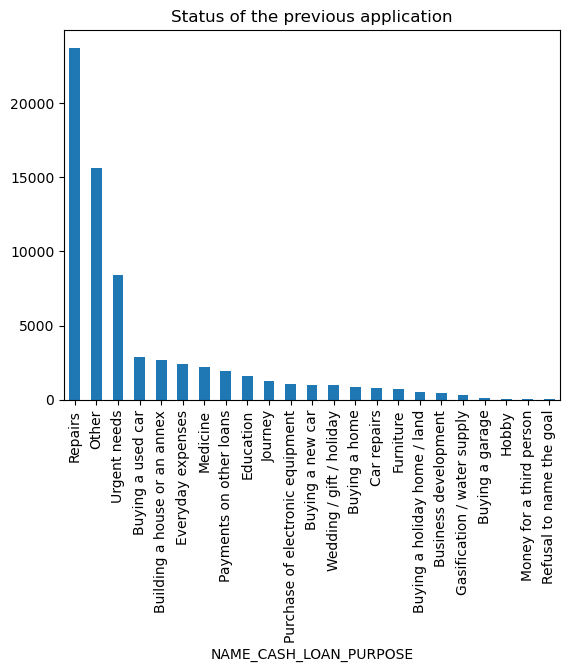

In [72]:
papp.NAME_CASH_LOAN_PURPOSE.value_counts().plot.bar()
plt.title('Status of the previous application')
plt.show()

## Bivariate analysis

In [73]:
# Count plotting in logarithmic scale

def bibar(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 10
    plt.rcParams['axes.titlesize'] = 15
    plt.rcParams['axes.titlepad'] = 10
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 4 + 8*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=90)
    plt.yscale('symlog')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='nipy_spectral') 
        
    plt.show()

### Relation between Defaulters or Clients who are able to pay the loans on time and Gender

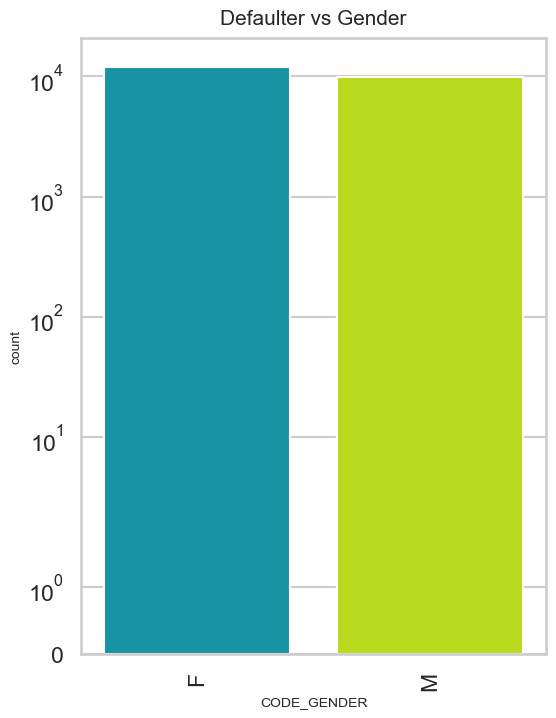

In [74]:
# Relation between Defaulter and gender
bibar(app2,col='CODE_GENDER',title='Defaulter vs Gender')

Amongst the defaulters or clients who are not able to pay their loans on time, there are more females than males. 

### Relation between the loan contracts and Gender differences in non defaulter clients 

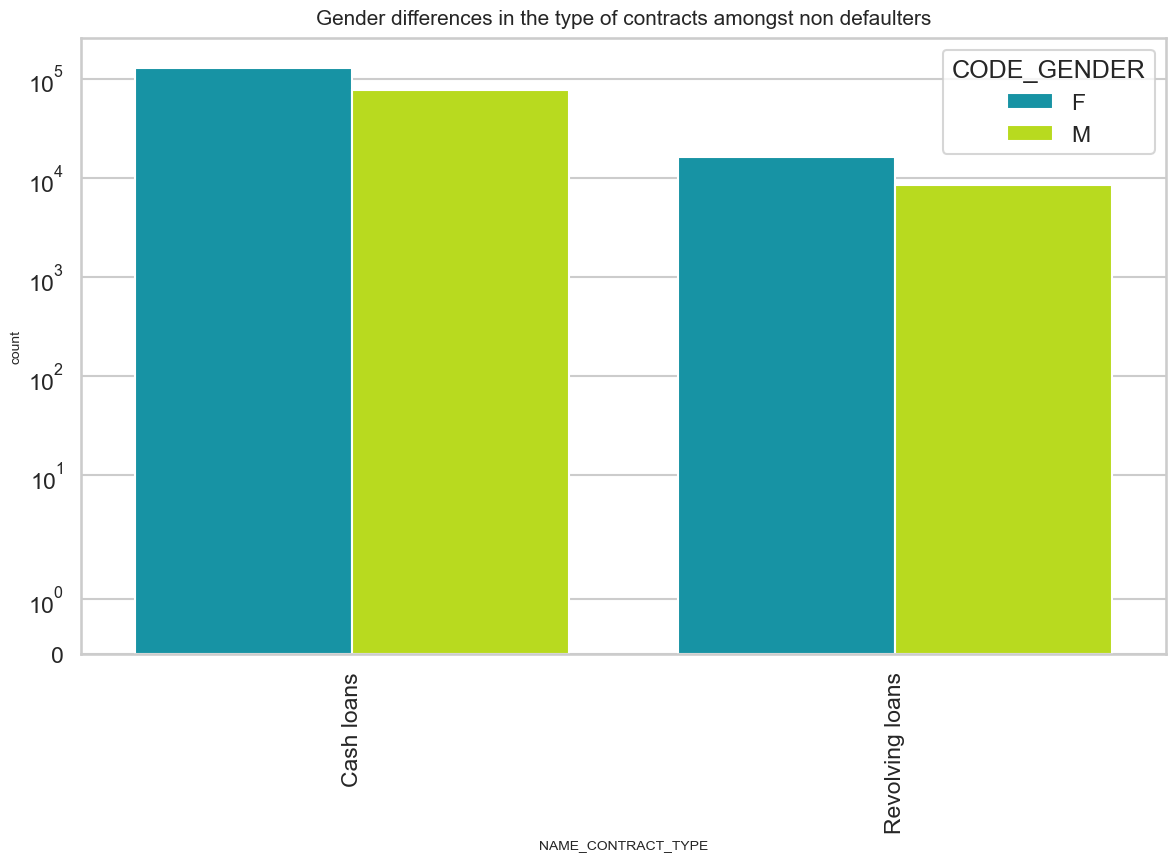

In [121]:
# Relation between Target and NAME_CONTRACT_TYPE for Non defaulters
bibar(app1,col='NAME_CONTRACT_TYPE',title= 'Gender differences in the type of contracts amongst non defaulters',hue='CODE_GENDER')

Non defaulters are able to pay their loans better in case of cash loans than revolving loans. 

Relation between the loan contracts and Gender differences in defaulter clients

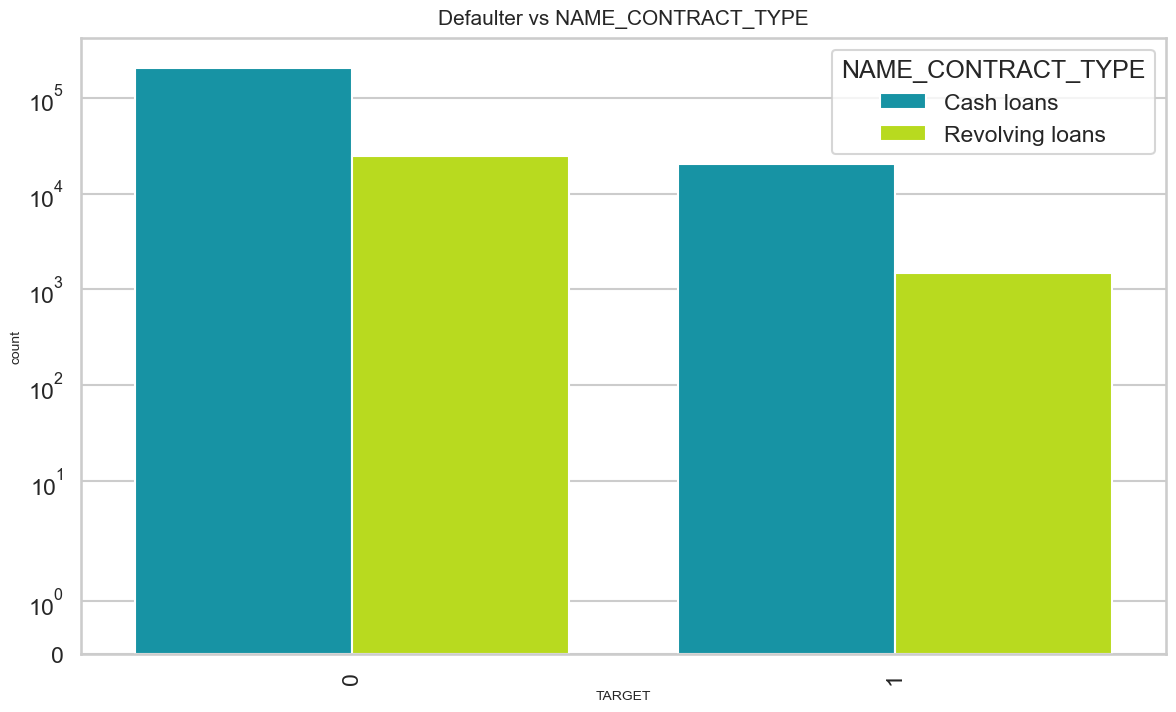

In [76]:
# Relation between Gender and NAME_CONTRACT_TYPE for Defaulter
bibar(app,col='TARGET',title='Defaulter vs NAME_CONTRACT_TYPE',hue='NAME_CONTRACT_TYPE')

Defaulters are able to pay their loans better in case of cash loans than revolving loans. 

### Relation between the Housing types and Defaulter status

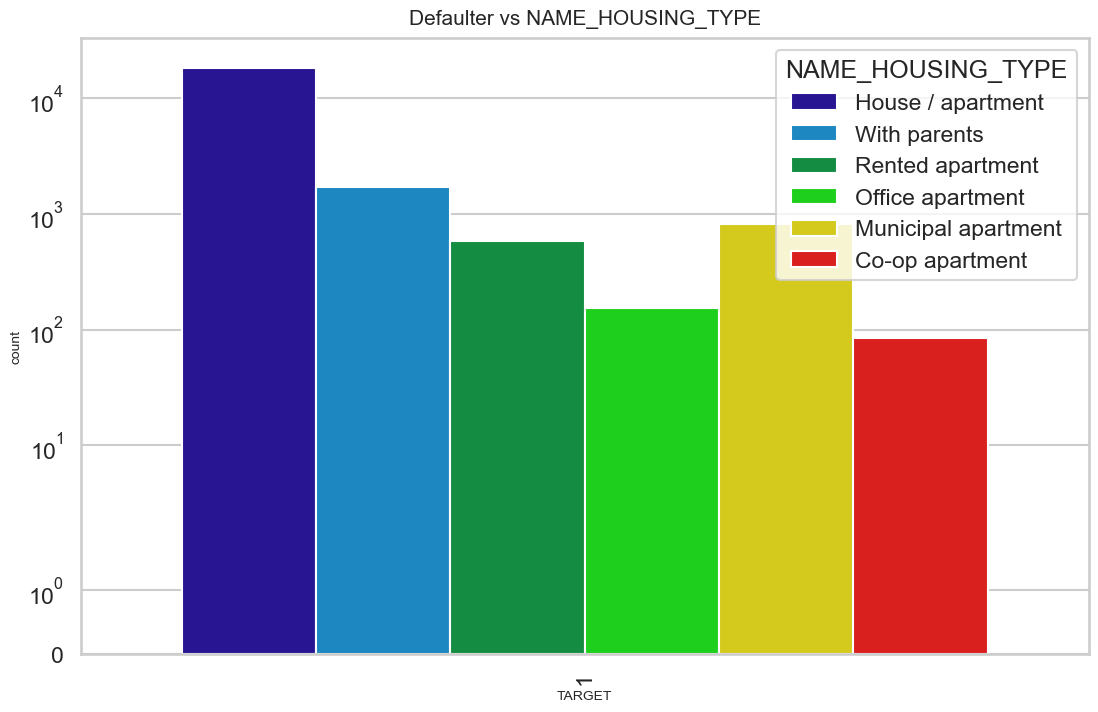

In [120]:
# Relation between Target and NAME_HOUSING_TYPE for Defaulters 
bibar(app2,col='TARGET',title='Defaulter vs NAME_HOUSING_TYPE', hue='NAME_HOUSING_TYPE')

It can be observed that clients living in house/apartments tend to have difficulty paying their loans. 

Clients living in the office or co op apartements do not face as much difficulties as others in paying their loans. 

### Relation between the Defaulter status and car ownership

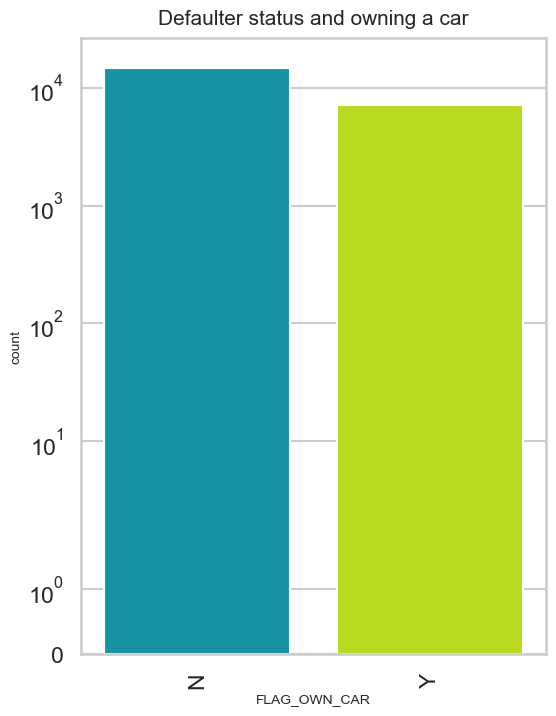

In [107]:
# Relation between Target and FLAG_OWN_CAR 
bibar(app2,col='FLAG_OWN_CAR',title='Defaulter status and owning a car')

It can be observed that clients who do not own car face slightly more difficulty in paying their loans.

### Relation between Defaulter status and incomes of clients

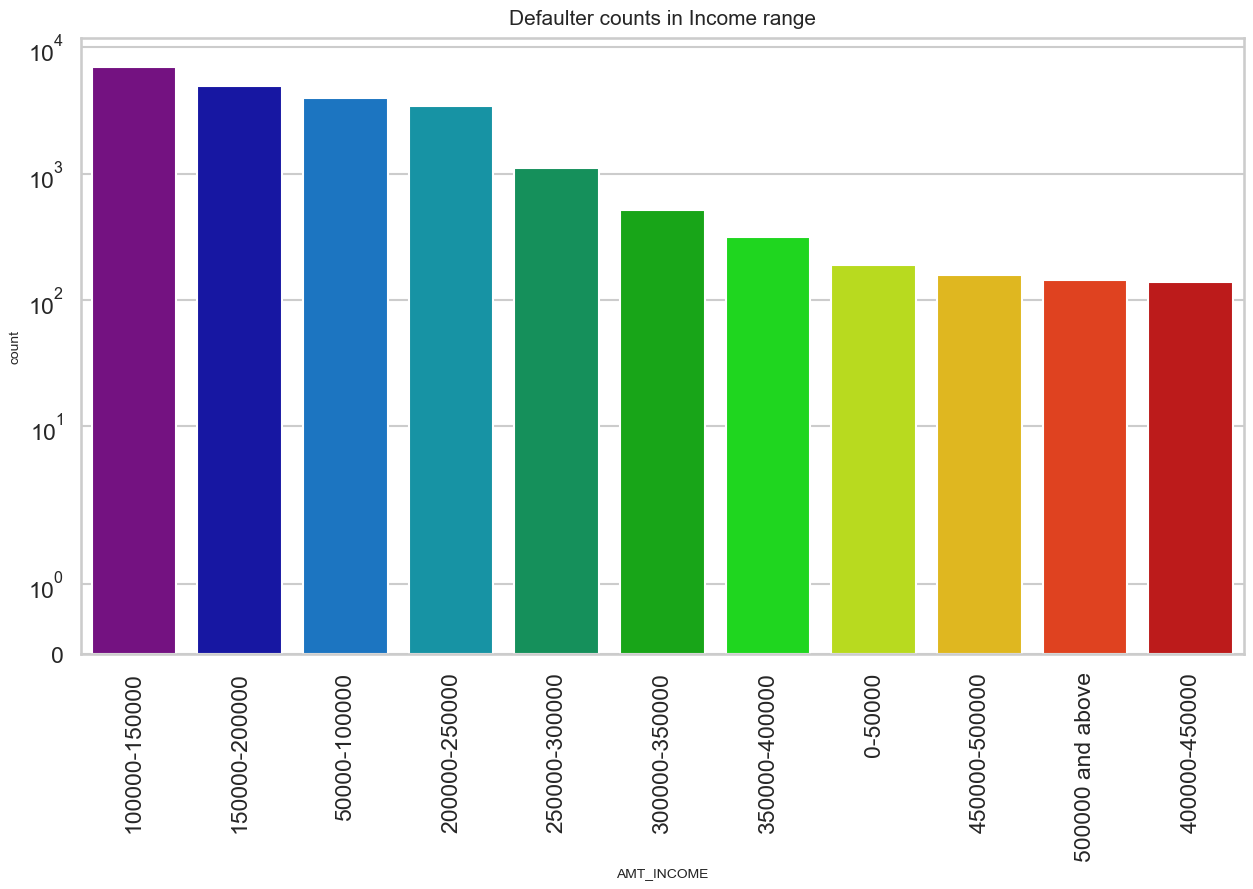

In [111]:
# Relation between Target and AMT_INCOME for Non-Defaulter
bibar(app2,col='AMT_INCOME',title='Defaulter counts in Income range')

People with income between 50000 to 300000 face more problems in paying their loan installments; however, this also depends on the amount of loan credited which is later analysed.

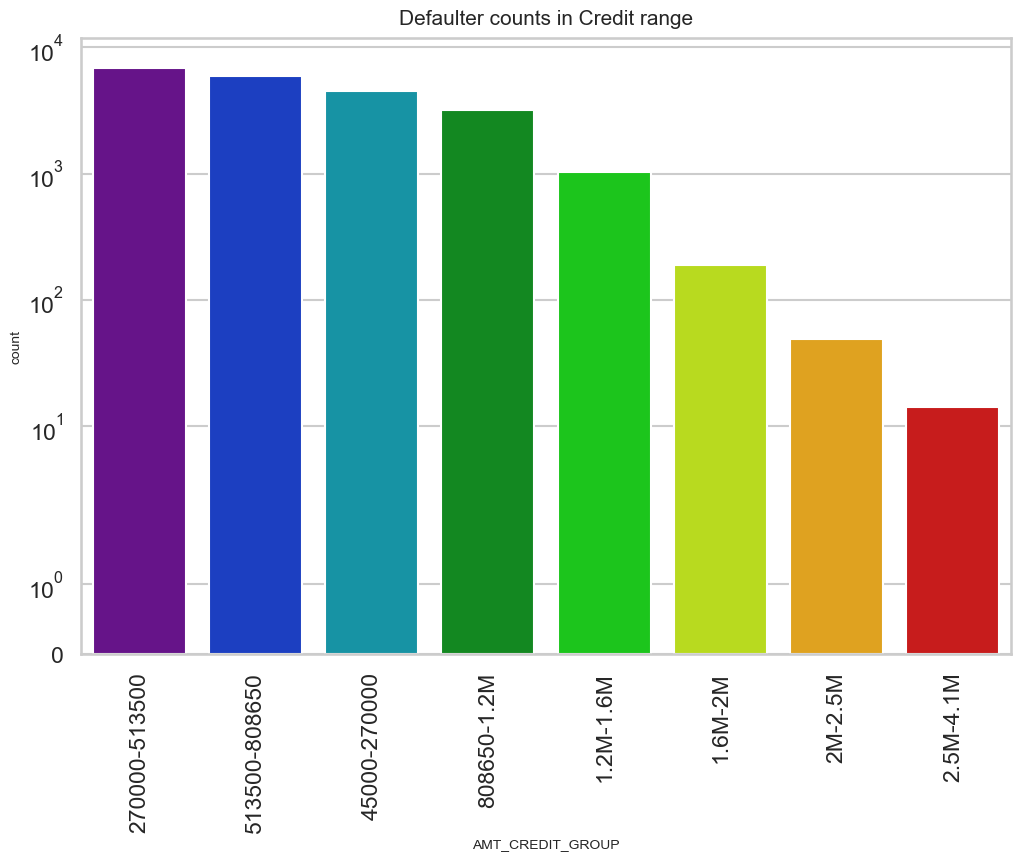

In [122]:
# Relation between Target and AMT_INCOME for Defaulter
bibar(app2,col='AMT_CREDIT_GROUP',title='Defaulter counts in Credit range')

## Relation between client's income levels and credit status 

### Relation between Defaulter status and client's family status

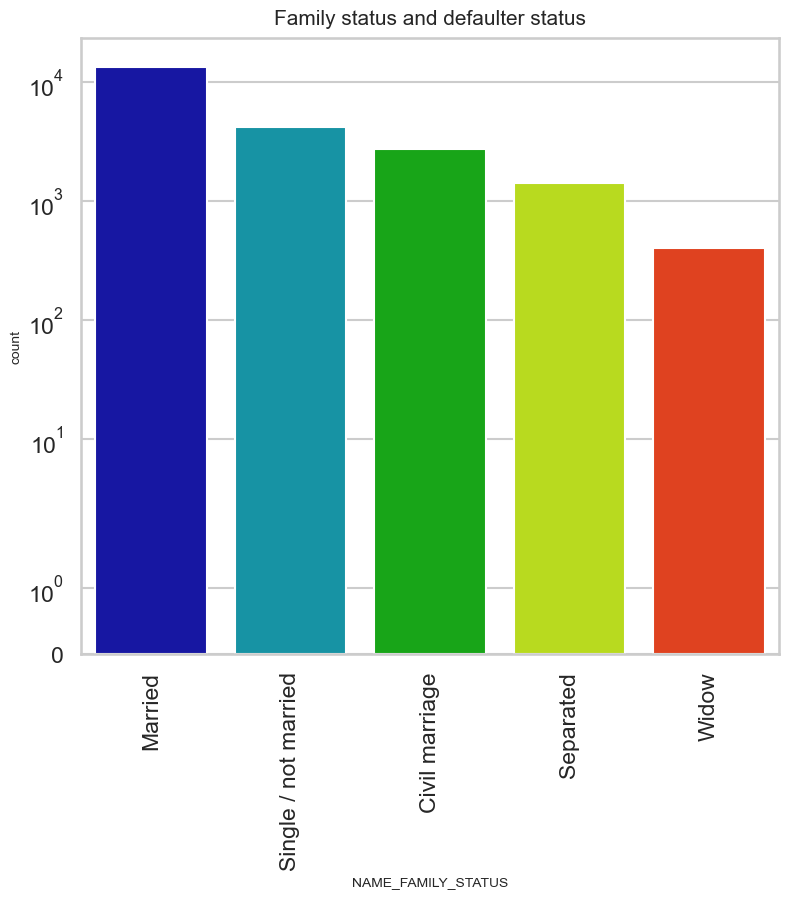

In [81]:
# Relation between Target and NAME_FAMILY_STATUS for Defaulter
bibar(app2,col='NAME_FAMILY_STATUS',title='Family status and defaulter status')

It can be oserved that married clients tend to face difficulty paying their loans. Consequently, widows tend to have lesser difficulties paying their loans. This could be due to lower expenses to bear. 

### Relation between Defaulter status and reaching their mobile phones

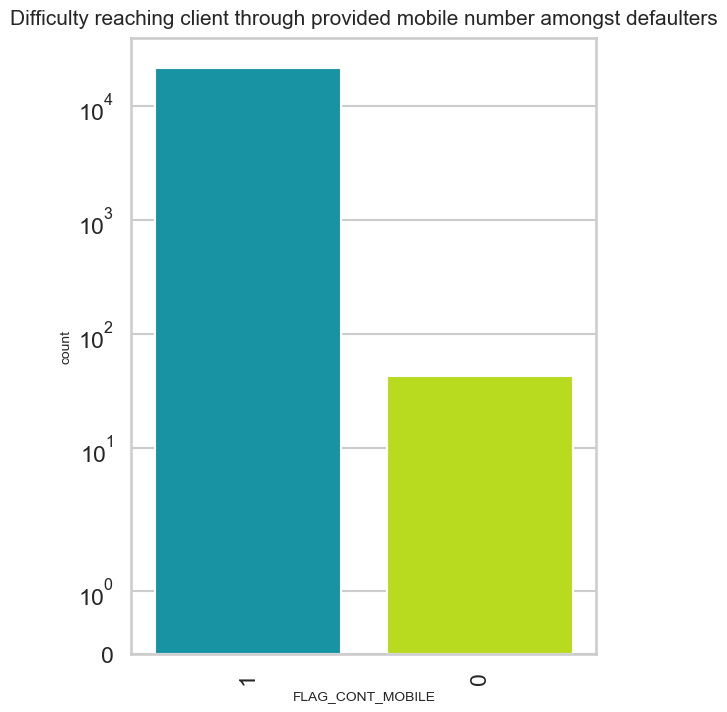

In [123]:
# Relation between Target and YEARS_BIRTH for Defaulter
bibar(app2,col='FLAG_CONT_MOBILE',title='Difficulty reaching client through provided mobile number amongst defaulters')

There was difficulty reaching a signifcant number of defaulter clients via their mobile phones despite providing a phone number. 

### Relation between Non-Defaulter status and age categories

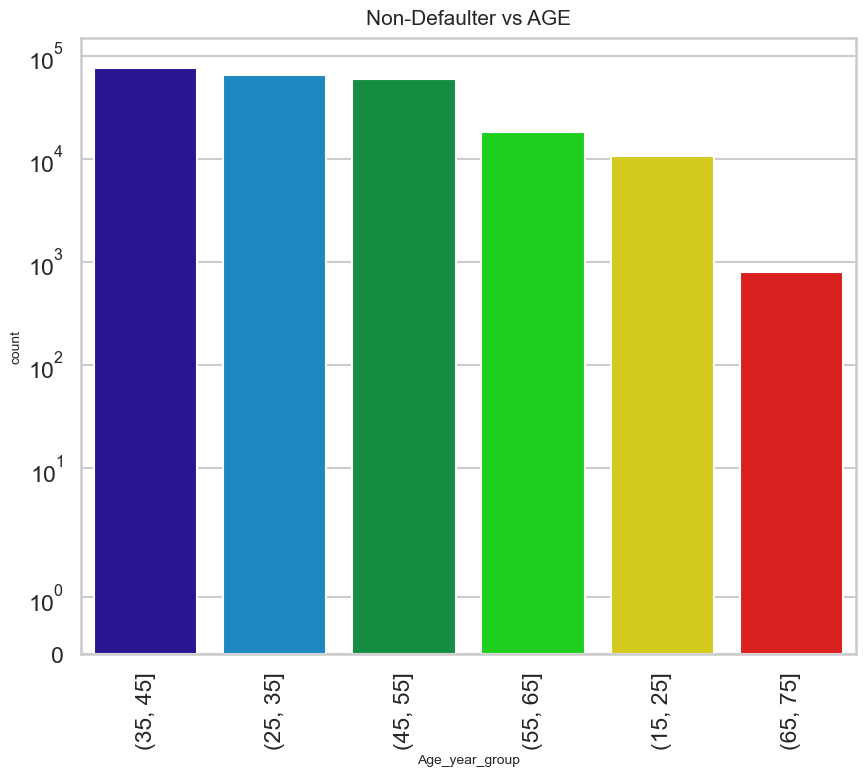

In [97]:
# Relation between Target and YEARS_BIRTH for Non-Defaulter
bibar(app1,col='Age_year_group',title='Non-Defaulter vs AGE')

### Relation between Defaulter status and age categories

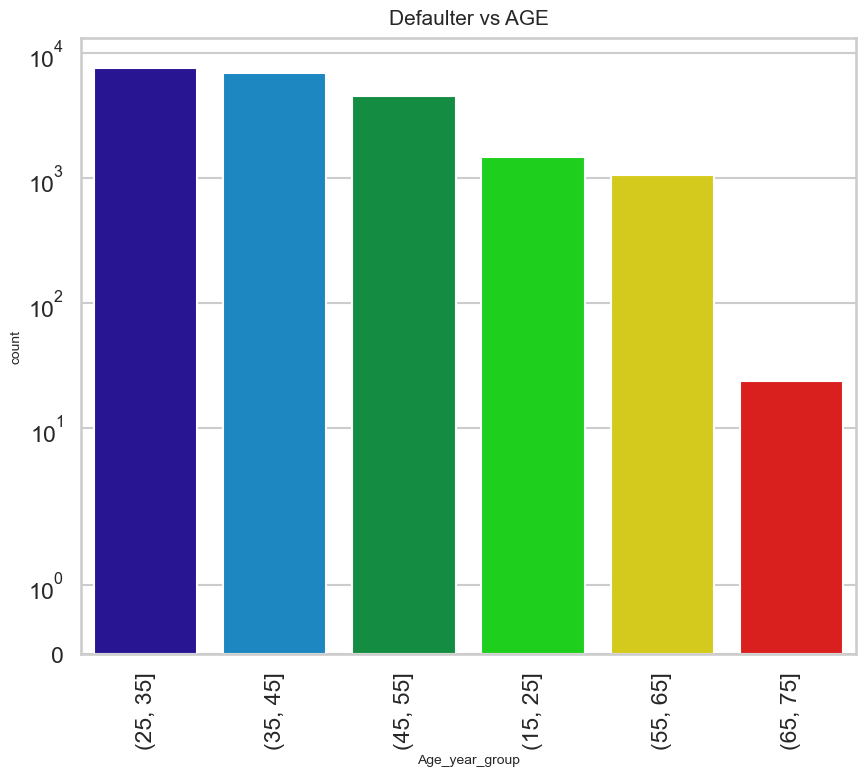

In [124]:
# Relation between Target and YEARS_BIRTH for Defaulter
bibar(app2,col='Age_year_group',title='Defaulter vs AGE')

The highest number of defaulters were found in age group of 25 to 35 years, followed by 35 to 40 years as well as 45 to 50 years of age. Rest age groups are comparatively lesser in number. 

There are signifantly low defaulters in age group of 65 to 75 years. 

### Relation between Defaulter status and Education level 

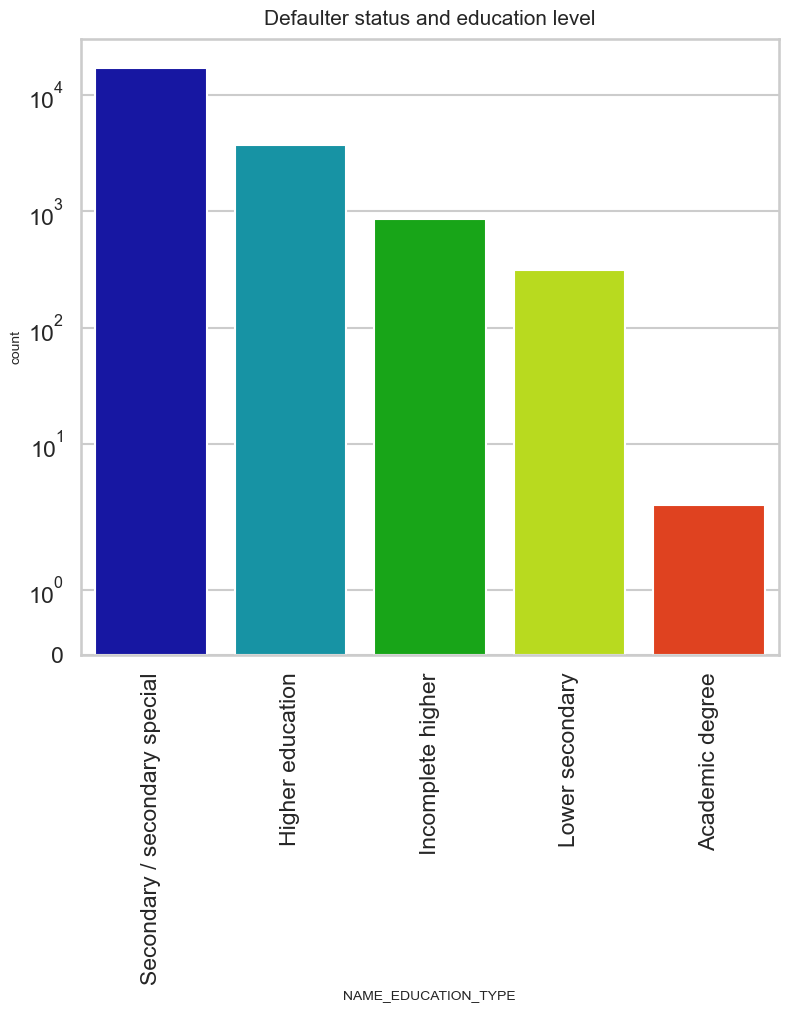

In [84]:
# Relation between Defaulter vs NAME_EDUCATION_TYPE
bibar(app2,col='NAME_EDUCATION_TYPE',title='Defaulter status and education level')

1) There are more defaulters with secondary level of education. 
2) Lesser clients with an academic degree tend to be defaulters.

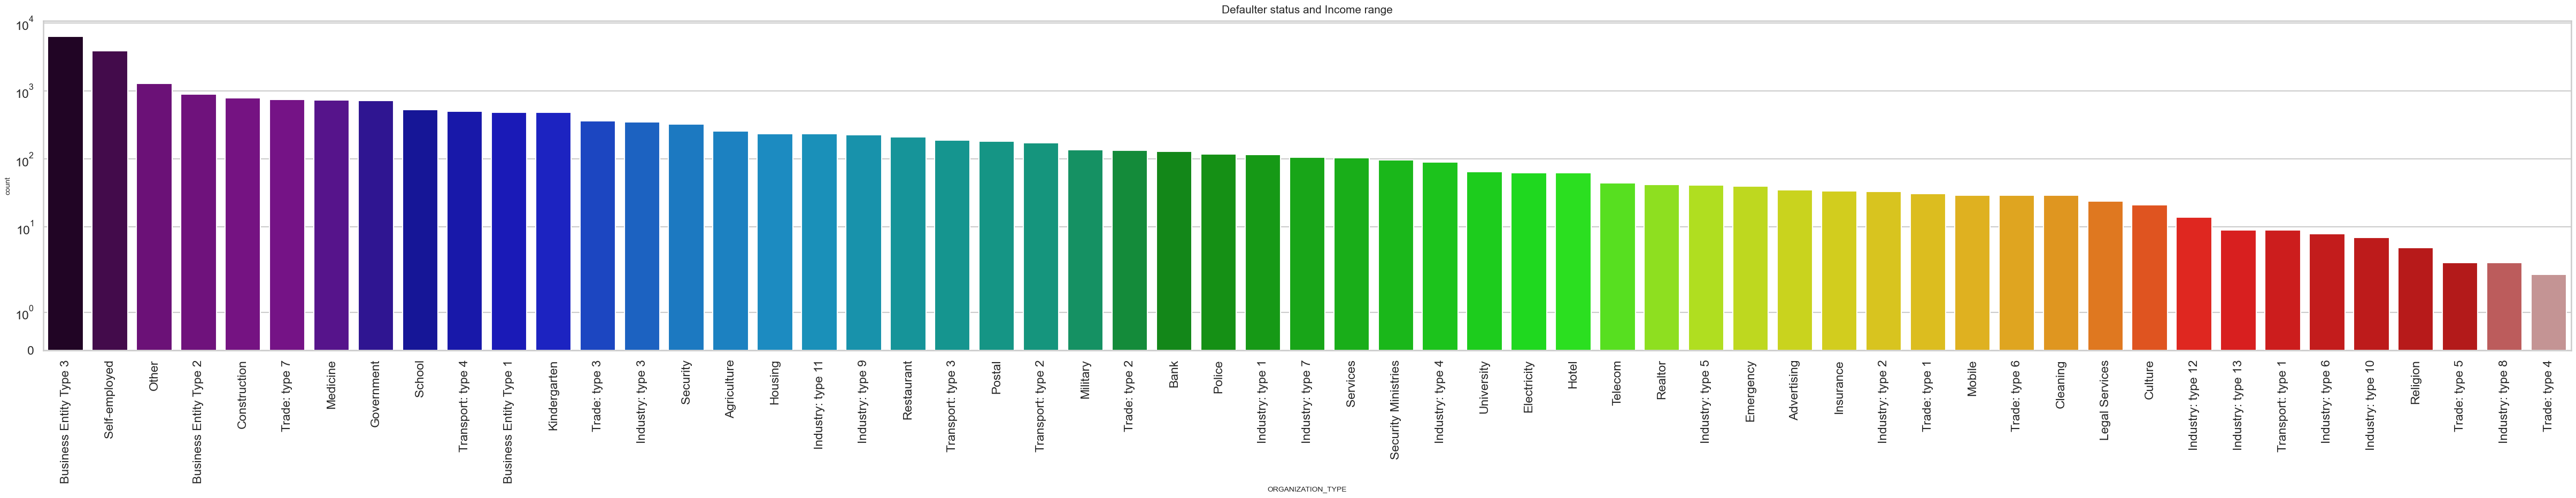

In [95]:
# Relation between Target and Organization for Defaulters 
bibar(app2,col='ORGANIZATION_TYPE',title='Defaulter status and Income range')

It can be observed that majority of the defaulters belong to Business Entity type 3 or are self employed.

## Multivariate Analysis

### Boxplot for Credit amount vs Educational Status for Defaulter's family status

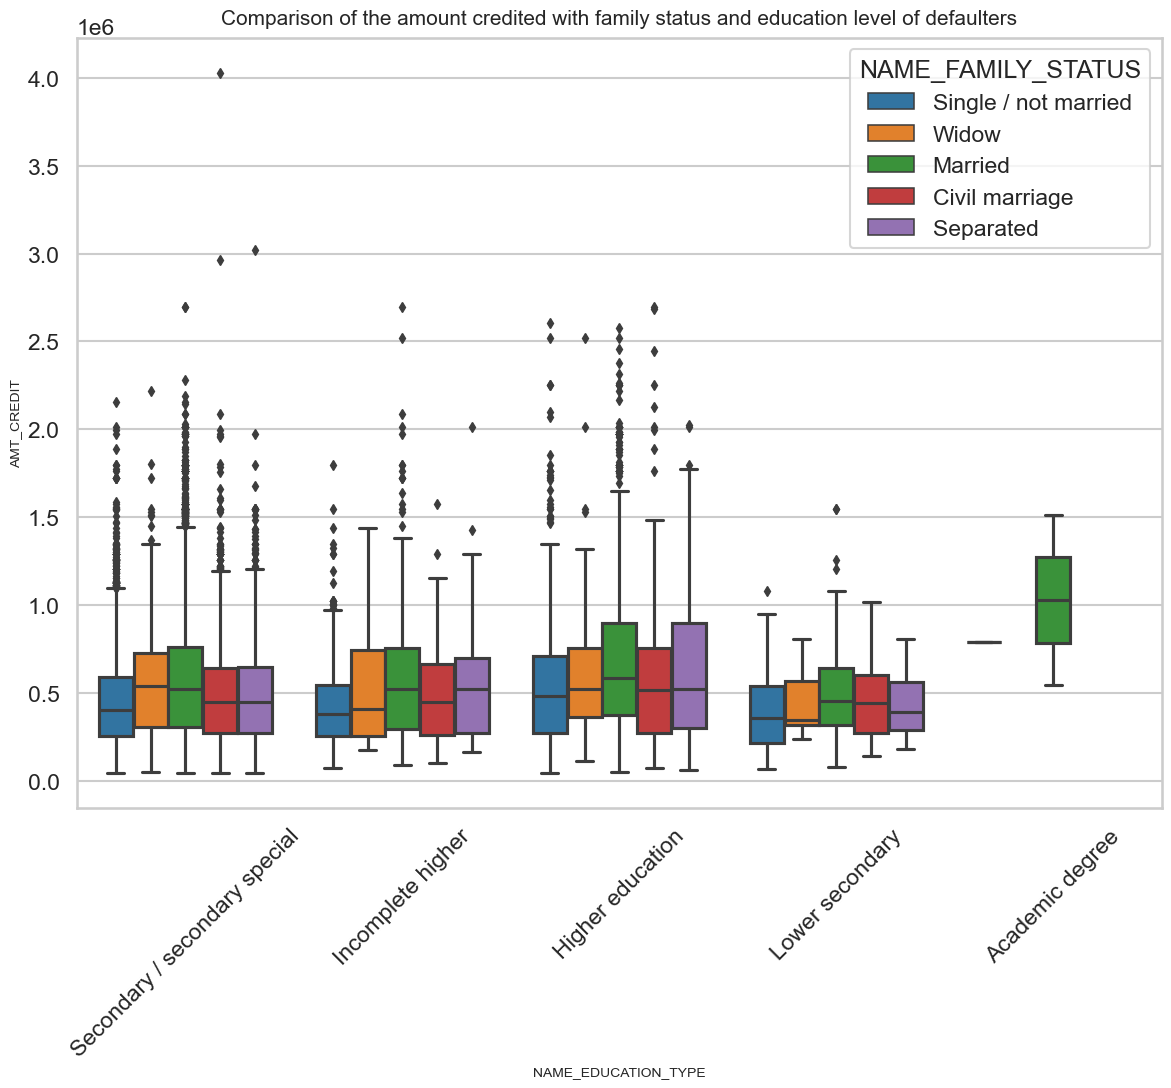

In [101]:
# Boxplot for Credit amount vs Educational Status for Defaulter Family Status

plt.figure(figsize=(14,10))
plt.xticks(rotation=45)
sns.boxplot(data = app2, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Comparison of the amount credited with family status and education level of defaulters')
plt.show()

The figure above shows boxlots depicting a multivariate analysis on the education level, family status and amount of loan credited amongst the defaulters. 
1) It can be observed that higher secondary education-separated-defaulter clients tend to have higher credit loans.

### Boxplot for Income amount vs Educational Status for Defaulter's family status

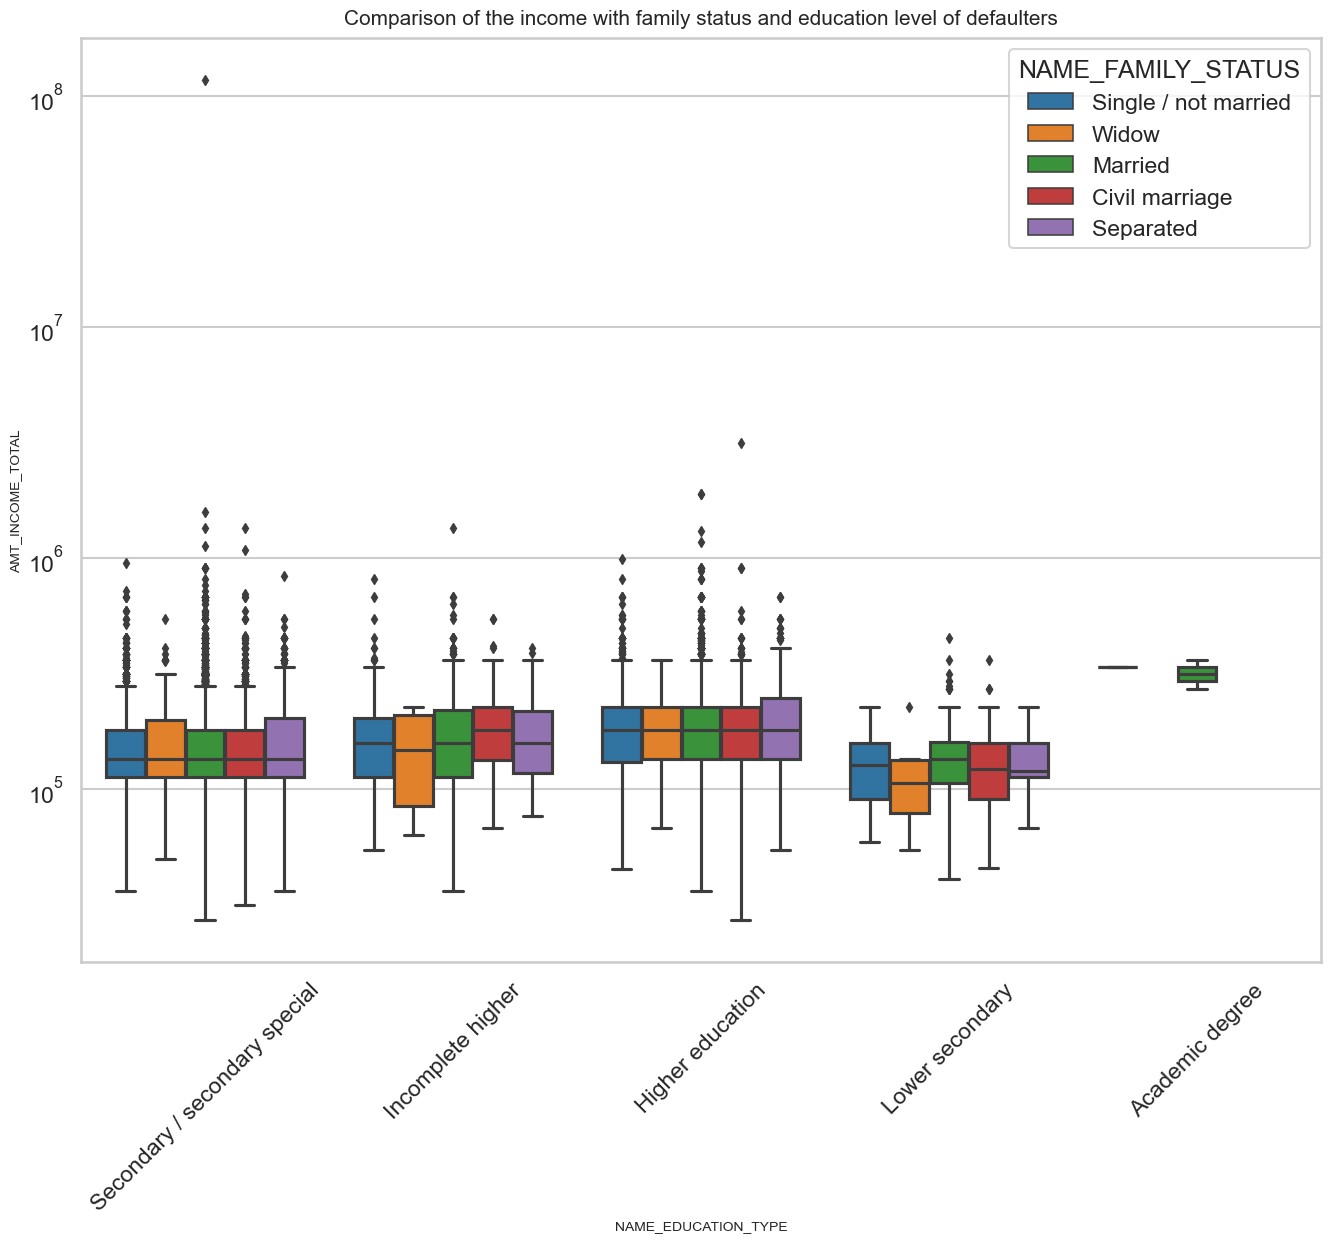

In [100]:
# Boxplot for Income amount vs Educational Status for Defaulter

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =app2, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Comparison of the income with family status and education level of defaulters')
plt.show()

### Boxplot for Credit amount vs Educational Status for Defaulter's Age group

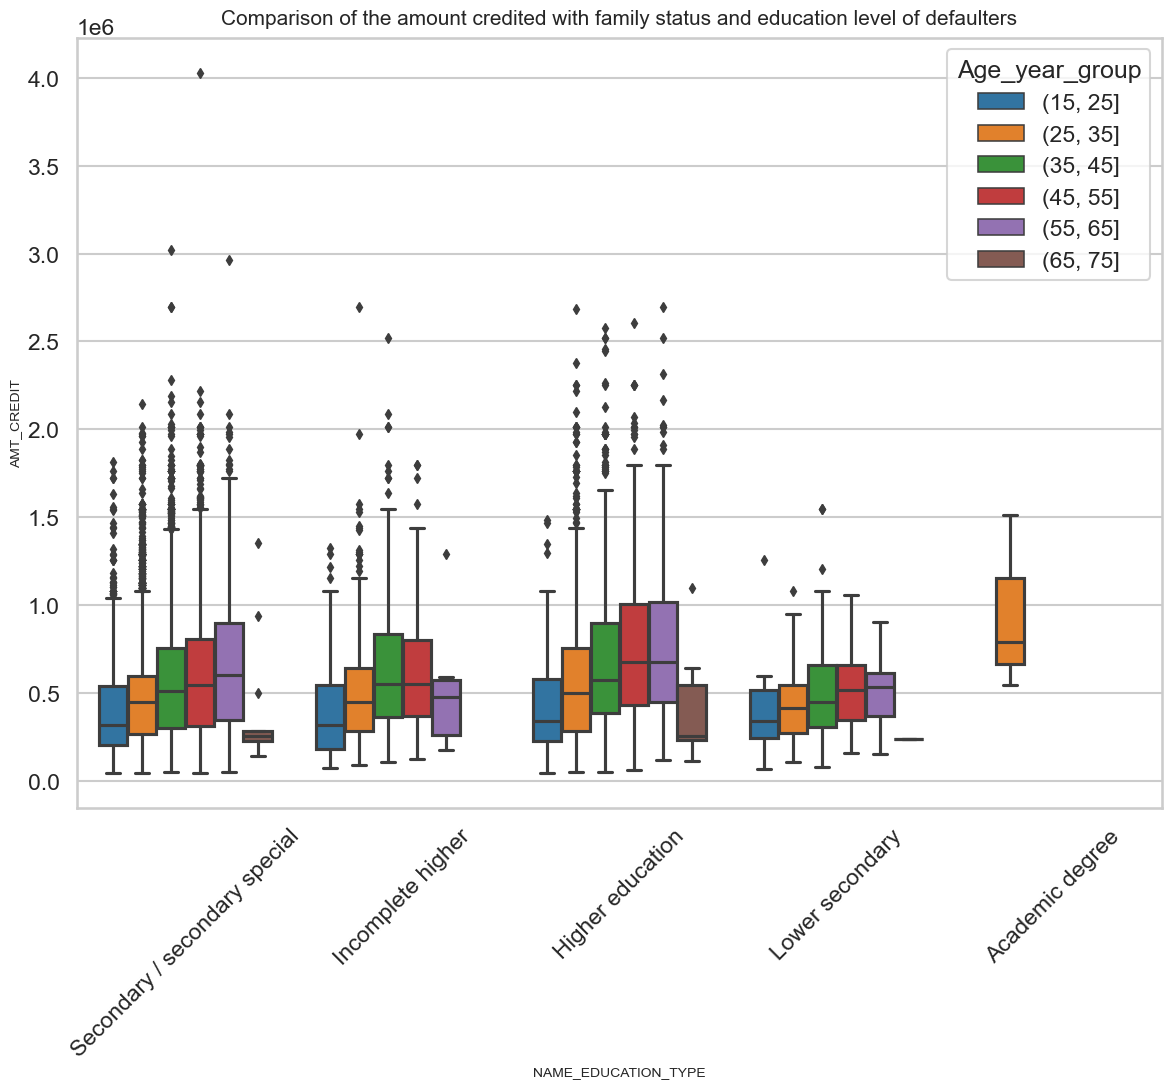

In [99]:
# Boxplot for Credit amount vs Educational Status for Defaulter

plt.figure(figsize=(14,10))
plt.xticks(rotation=45)
sns.boxplot(data = app2, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='Age_year_group',orient='v')
plt.title('Comparison of the amount credited with family status and education level of defaulters')
plt.show()

### Boxplot for Income amount vs Educational Status for Defaulter's Age group

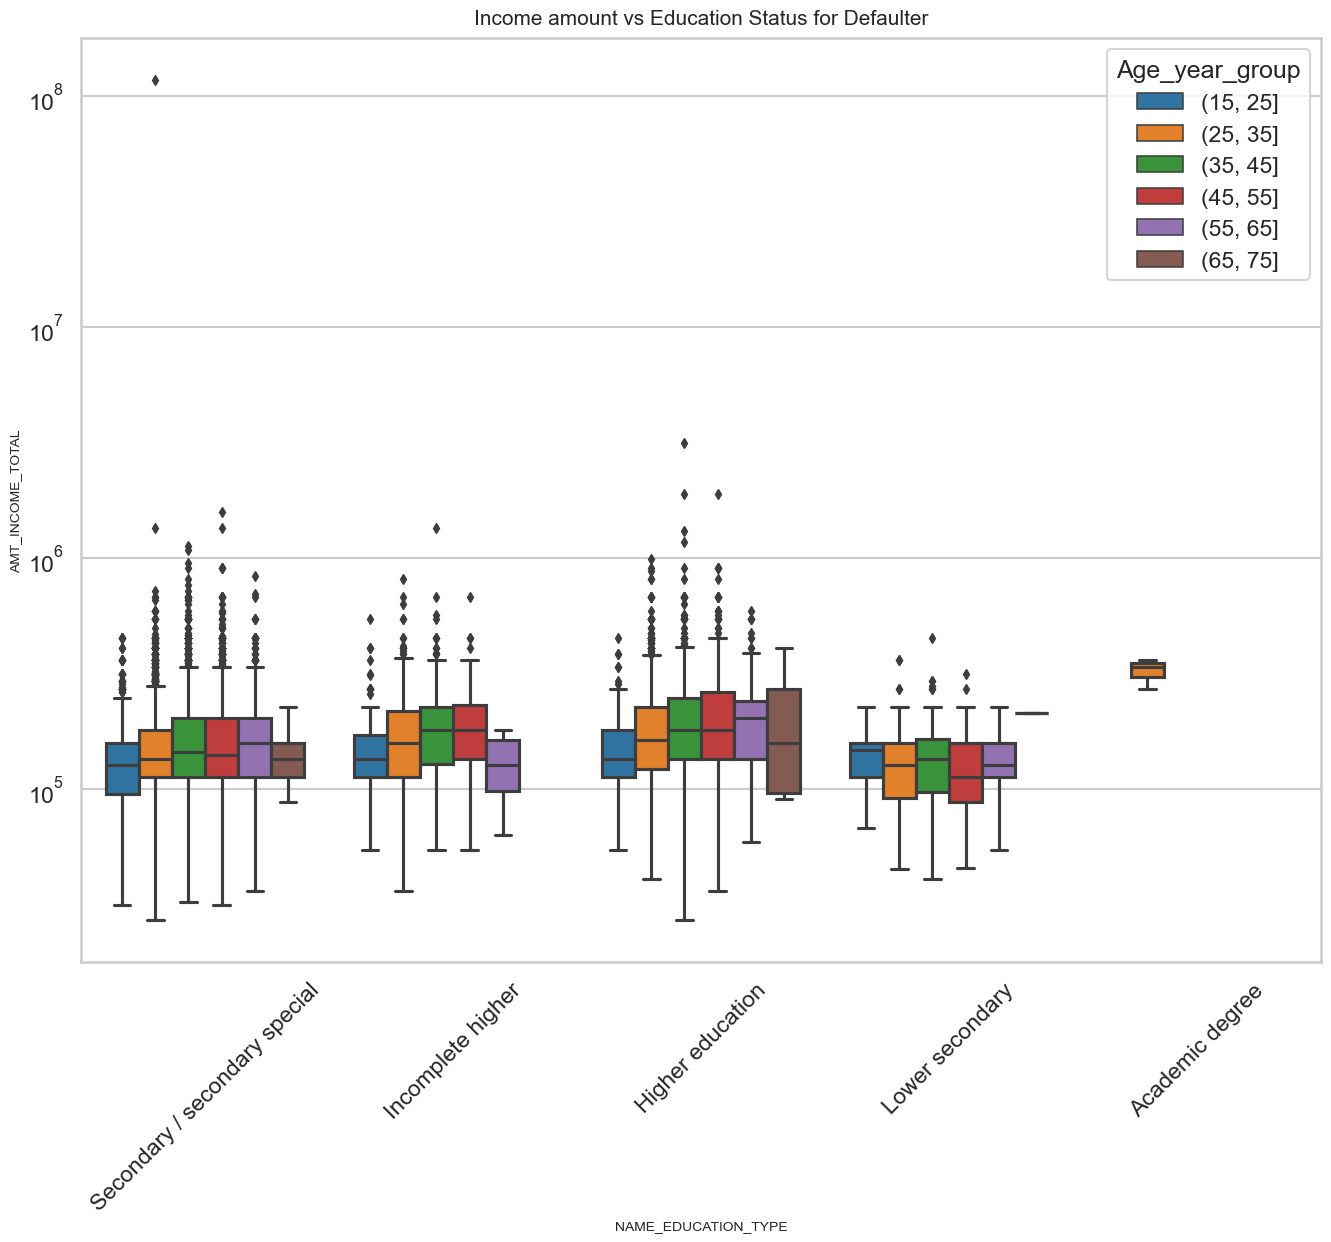

In [89]:
# Boxplot for Income amount vs Educational Status for Defaulter

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =app2, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='Age_year_group',orient='v')
plt.title('Income amount vs Education Status for Defaulter')
plt.show()

### Boxplot for Credit amount of all age group for Defaulter's 

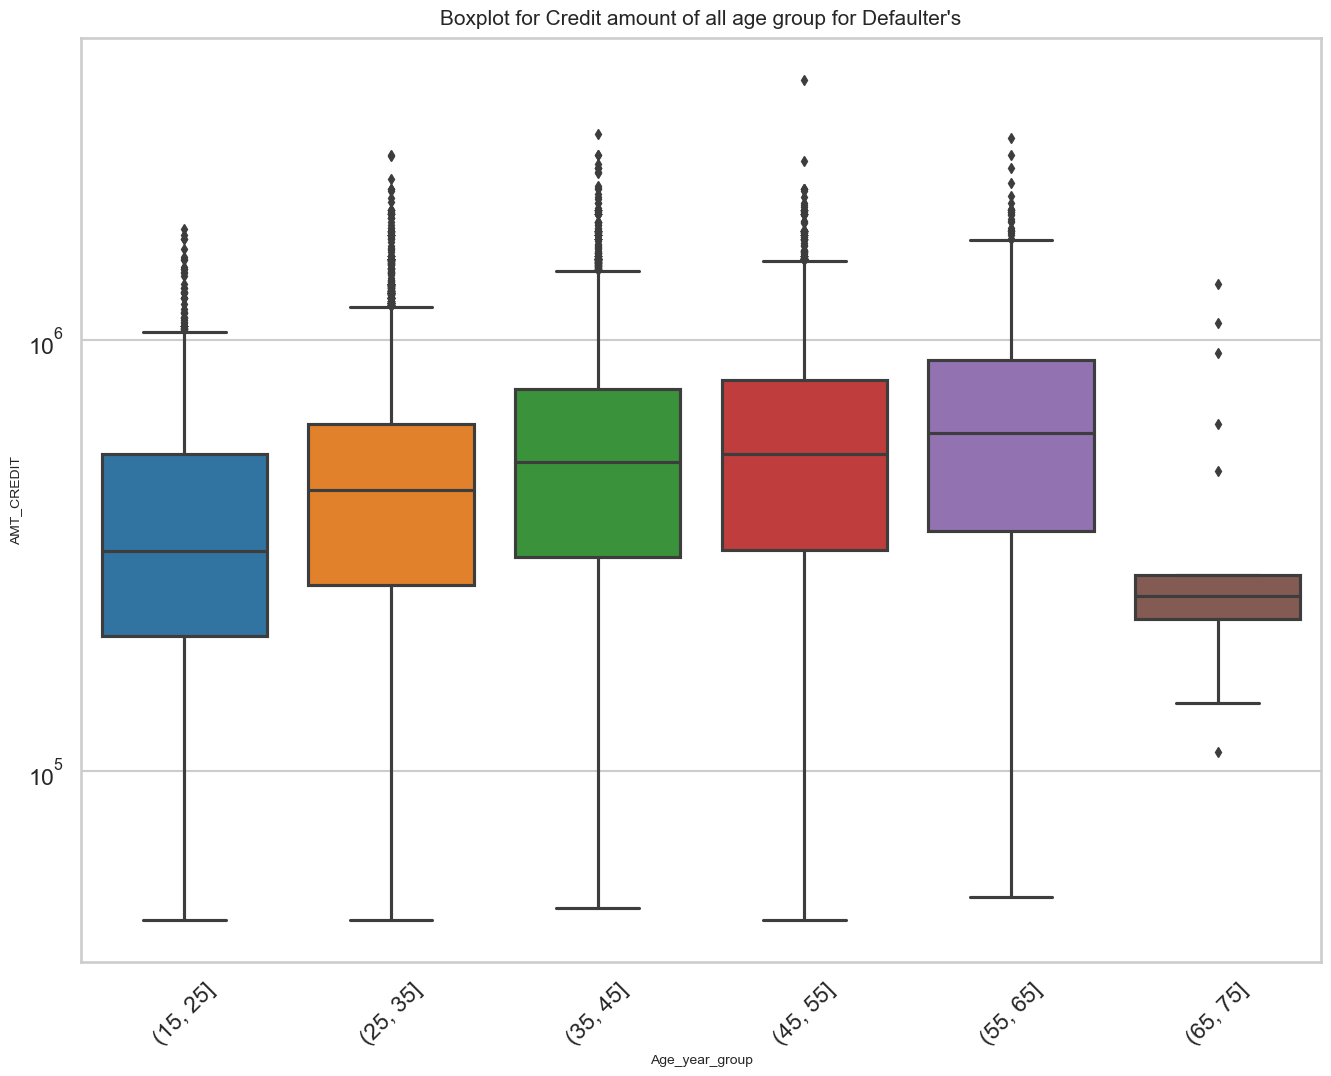

In [105]:
# Boxplot for Income amount vs Educational Status for Non-Defaulter

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =app2, x='Age_year_group',y='AMT_CREDIT',orient='v')
plt.title('Boxplot for Credit amount of all age group for Defaulter\'s')
plt.show()

### Boxplot for Income amount of all age group for Defaulter's

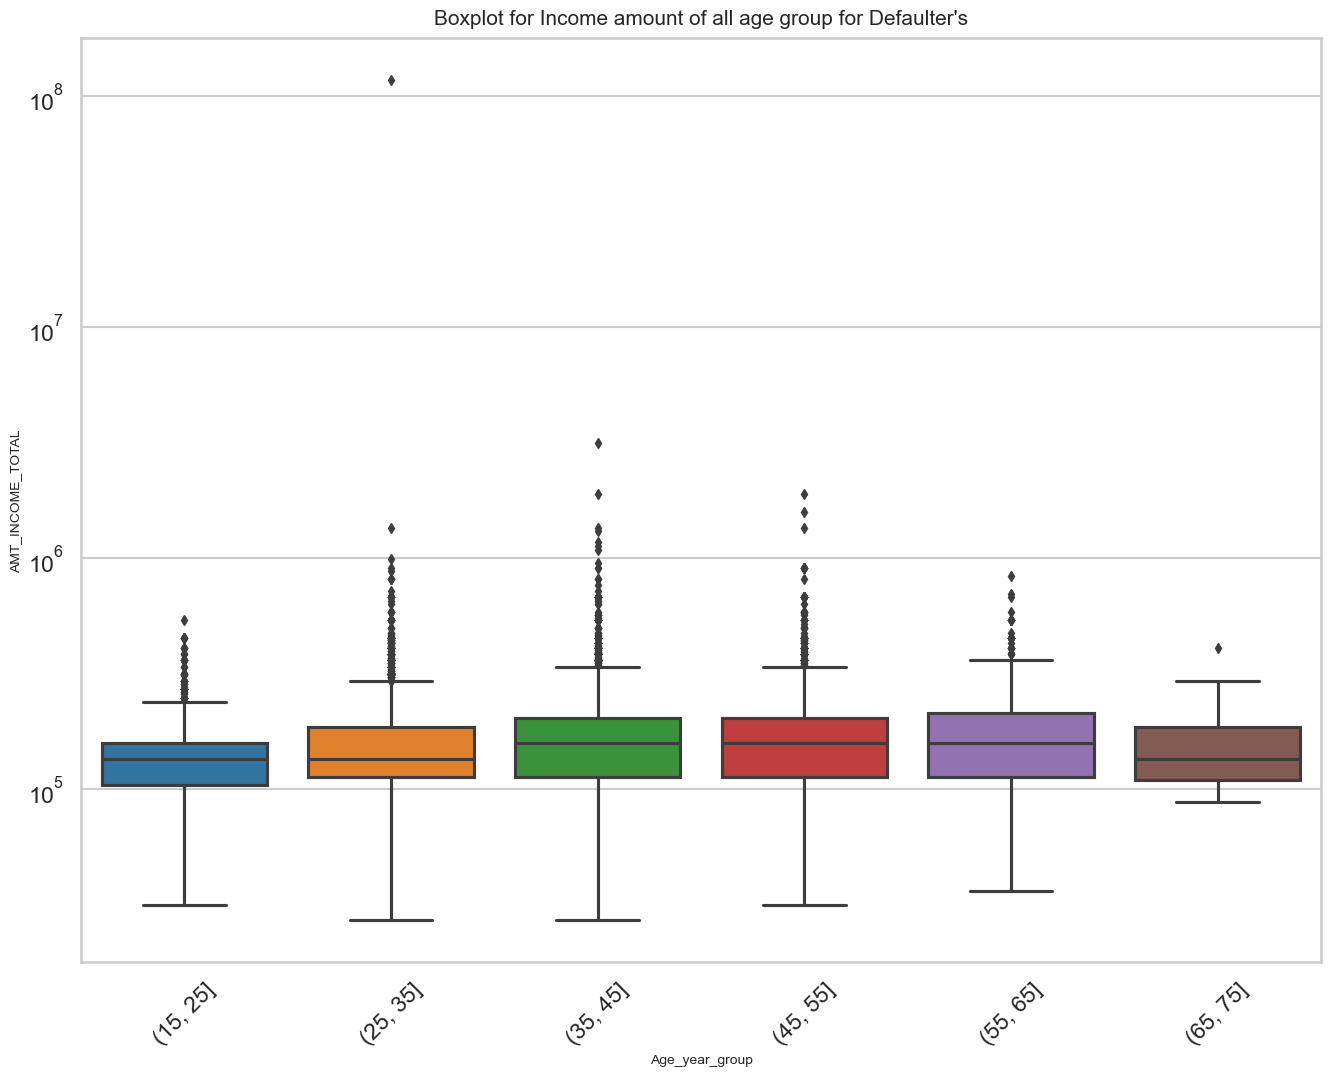

In [106]:
# Boxplot for Income amount vs Educational Status for Non-Defaulter

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =app2, x='Age_year_group',y='AMT_INCOME_TOTAL',orient='v')
plt.title('Boxplot for Income amount of all age group for Defaulter\'s')
plt.show()

# Conclusion

### Defaulters/Risky Clients

1) Age: Usually 25 to 45 years of age
2) Gender: Males more than females
3) Loan type: Cash loan
4) Education level: Secondary and Higher Education 
5) Income level: 50000 to 300000
6) Housing type: House/Apartment and with parents 
7) Family status: Married and Single 
8) Car owning status: No 
9) More previously rejected loans
10) Organization type: 'Business Entity type 3', 'self employed', 'Other', 'Business Entity type 2' or 'Construction' 
11) Companies have difficulty reaching risky clients on phone 


### Non Defaulters/ Non Risky Clients

1) Age: Usually 65 to 75 years of age 
2) Gender: Females more than men; however, they take more loans than men.
3) Loan type: Revolving loans 
4) Education level: Academic degree 
5) Income level: Above 300000
6) Housing type: Office and co-op apartments 
7) Family status: Widowed and separated 
8) Car owning status: Yes
9) More previously approved loans 
10) Organization type: Industry type 10', 'Religion', 'Trade type 5', 'Industry type 8', and 'Trade type 4'
11) Companies do not have difficulty reaching risky clients on phone  
